# String simulator results analysis

In [10]:
from matplotlib import pyplot as plt
from matplotlib import animation as ani
import numpy as np
import scipy as sp

import time
import pickle

In [11]:
#set serif font
plt.rcParams["font.family"]="serif"
plt.rcParams["mathtext.fontset"]="dejavuserif"

## Load simulation results

In [12]:
with open("op_p.dat", "rb") as f:
    s_op_p = pickle.load(f)

with open("op_n.dat", "rb") as f:
    s_op_n = pickle.load(f)

with open("op_h.dat", "rb") as f:
    s_op_h = pickle.load(f)

with open("palm.dat", "rb") as f:
    s_palm = pickle.load(f)

with open("har2.dat", "rb") as f:
    s_har2 = pickle.load(f)

with open("har3.dat", "rb") as f:
    s_har3 = pickle.load(f)

## Plotting displacement vs. time at x=0.6 m

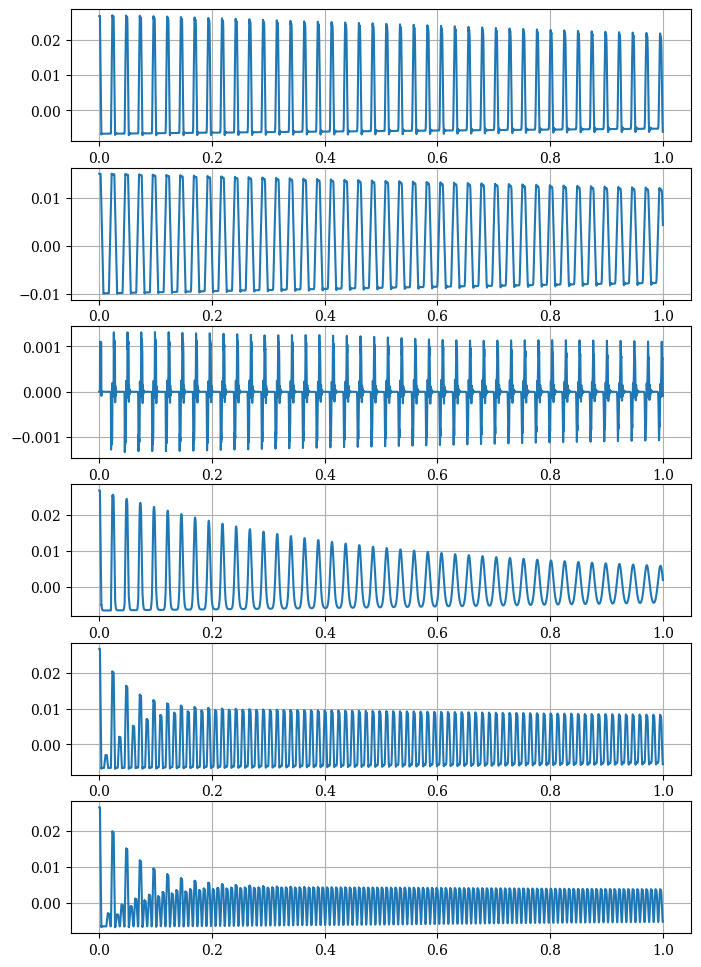

In [13]:
f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=6, figsize=(8, 12))

ax1.plot(s_op_p["t"], s_op_p["y"][400,:])
ax2.plot(s_op_n["t"], s_op_n["y"][400,:])
ax3.plot(s_op_h["t"], s_op_h["y"][400,:])
ax4.plot(s_palm["t"], s_palm["y"][400,:])
ax5.plot(s_har2["t"], s_har2["y"][400,:])
ax6.plot(s_har3["t"], s_har3["y"][400,:])

for a in (ax1, ax2, ax3, ax4, ax5, ax6):
    a.grid(True)
    #a.set_xlim(0.5, 0.53)

## Fourier transforms of displacement

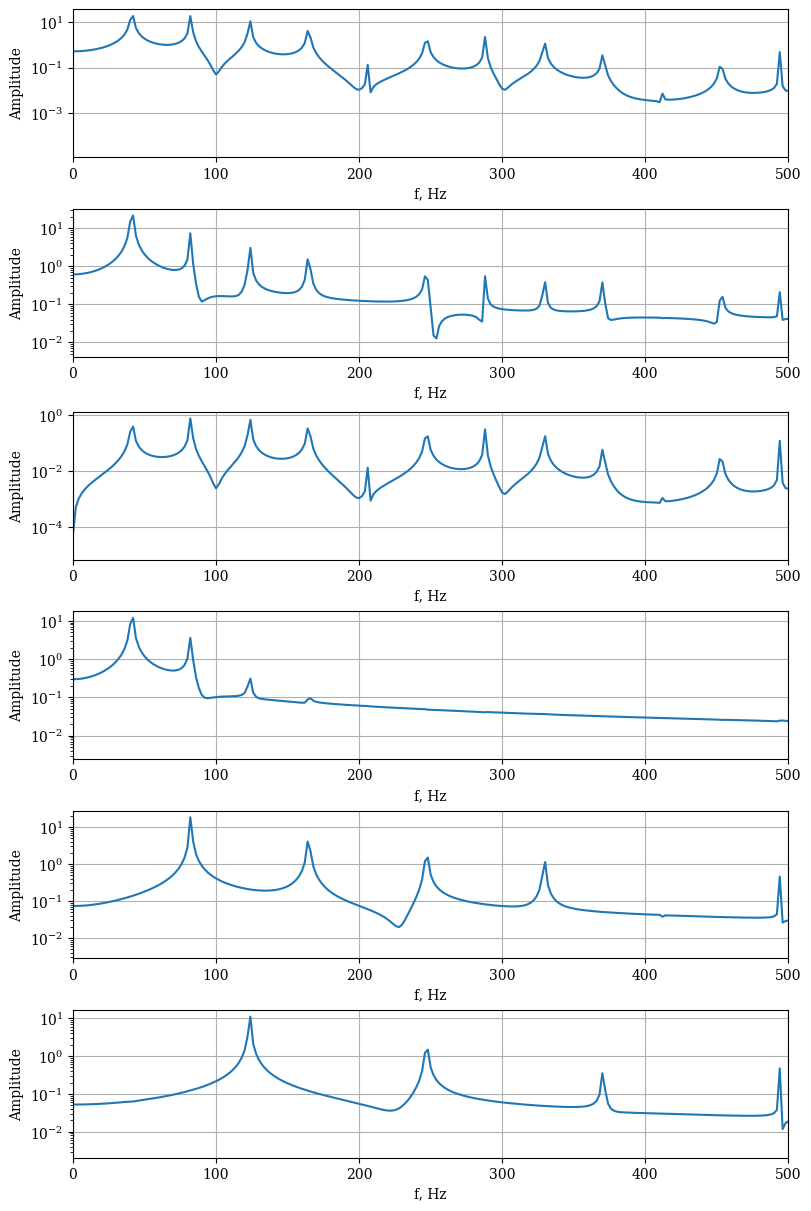

In [20]:
f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=6, layout="constrained", figsize=(8, 12))

ft_op_p=sp.fft.fft(s_op_p["y"][400,5000:])
ft_op_n=sp.fft.fft(s_op_n["y"][400,5000:])
ft_op_h=sp.fft.fft(s_op_h["y"][400,5000:])
ft_palm=sp.fft.fft(s_palm["y"][400,5000:])
ft_har2=sp.fft.fft(s_har2["y"][400,5000:])
ft_har3=sp.fft.fft(s_har3["y"][400,5000:])


ax1.plot(np.arange(ft_op_p.size)*2, np.absolute(ft_op_p))
ax2.plot(np.arange(ft_op_n.size)*2, np.absolute(ft_op_n))
ax3.plot(np.arange(ft_op_h.size)*2, np.absolute(ft_op_h))
ax4.plot(np.arange(ft_palm.size)*2, np.absolute(ft_palm))
ax5.plot(np.arange(ft_har2.size)*2, np.absolute(ft_har2))
ax6.plot(np.arange(ft_har3.size)*2, np.absolute(ft_har3))

for a in (ax1, ax2, ax3, ax4, ax5, ax6):
    a.set_xlim(left=0, right=500)
    a.set_yscale("log")
    #a.set_ylim(bottom=10**-2.5)
    a.grid(True)
    #because the simulation duration is 1 second, frequencies are in units of Hz
    a.set_xlabel("f, Hz")
    a.set_ylabel("Amplitude")

#plt.savefig("ftt.png", dpi=500)